# **OBJETIVO DO ROTEIRO:** Agrupar um conjunto de dados não rotulados em um número ideal de *K* clusters com base em suas características, de forma que o modelo alcance as métricas de avaliação desejadas.


## 1. Configuração do ambiente e carregamento dos dados

* Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Certifique-se de que as bibliotecas necessárias estejam instaladas. O código começa com a importação e o carregamento do dataset:

In [7]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregamento do dataset (certifique-se de colocar o caminho correto para o arquivo CSV)
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Análise exploratória e tratamento de dados

Para K-means, precisaremos apenas das colunas numéricas relevantes. Normalmente, neste dataset, utilizamos a "Annual Income (k$)" e "Spending Score (1-100)".

In [8]:
# Verificando as informações do dataset
print(data.info())

# Selecionando as colunas numéricas de interesse
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## 3. Escolha do número ideal de clusters usando o método do cotovelo

O método do cotovelo ajuda a identificar o número ideal de clusters observando onde a curva da inércia começa a se estabilizar.

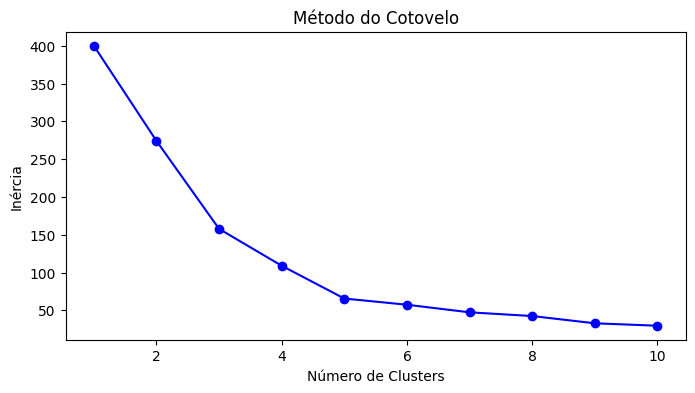

In [9]:
# Método do cotovelo para determinar o número de clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualizando o método do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

## 4. Aplicação do algoritmo K-means

Escolhendo o número de clusters baseado no gráfico do método do cotovelo.

In [10]:
# Aplicando o K-means com o número ideal de clusters (ex: k=5)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Adicionando o resultado dos clusters ao dataset
data['Cluster'] = clusters

## 5. Visualização dos clusters

Para visualizar os clusters formados, podemos criar um gráfico de dispersão com as colunas "Annual Income (k$)" e "Spending Score (1-100)".

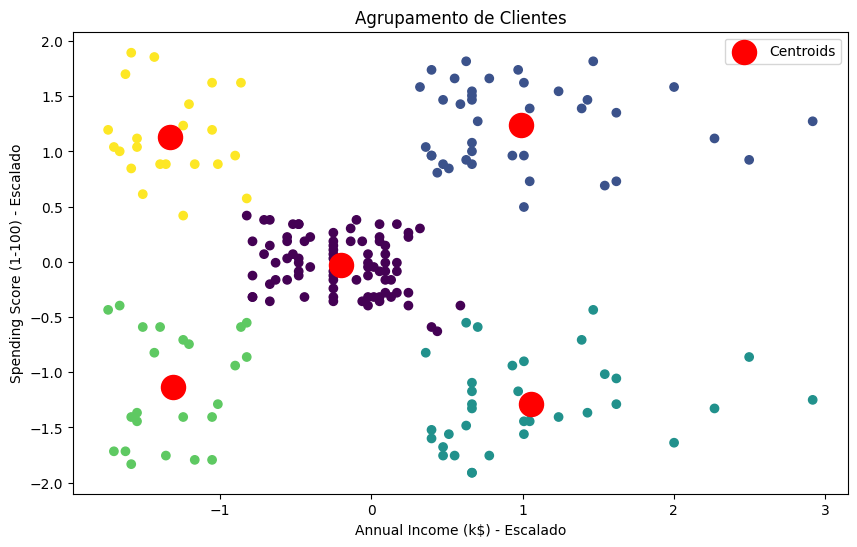

In [11]:
# Visualizando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$) - Escalado')
plt.ylabel('Spending Score (1-100) - Escalado')
plt.title('Agrupamento de Clientes')
plt.legend()
plt.show()